Working with Real Data
IMPROVE
1. Go to http://views.cira.colostate.edu/fed/QueryWizard/Default.aspx
2. Download data for the GUMO1 site. Site location file can be found here:
Guadalupe Mountains National Park, TX, Lat. 31.833, Long. -104.8094
3. Make a Pie Chart for chemical composition of PM2.5 chemical composition for
1995, 2005 and 2015 for this site. Which five species are most abundant in PM2.5 at
GUMO1?
4. Look at the full time period of the data record, and analyze the long-term trend
of PM2.5, and its five most major components at GUMO1.

In [78]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [79]:
# Load data
filename = 'PM2.5 Chem_Comp_1988_2024.xlsx'
data = pd.read_excel(filename, sheet_name='Data', header=0, index_col=0)
data.index.name=None
data

,SiteCode,POC,Date,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
IMPAER,GUMO1,1,03/02/1988,0.13704,-999.00000,-999.00000,0.00437,0.00185,0.16042,-999.00000,...,0.29746,0.07287,1.46020,0.00118,-999.00000,0.30797,0.00660,0.00000,0.00698,0.00000
IMPAER,GUMO1,1,03/05/1988,0.15642,-999.00000,-999.00000,0.00000,0.00133,0.10295,-999.00000,...,0.24182,0.13581,1.29476,0.00280,-999.00000,0.43653,0.00692,0.00000,0.00389,0.00000
IMPAER,GUMO1,1,03/09/1988,0.12427,-999.00000,-999.00000,0.00000,0.00254,0.13271,-999.00000,...,0.18951,0.06735,1.09515,0.00146,-999.00000,0.13544,0.00418,0.00000,0.00570,0.00000
IMPAER,GUMO1,1,03/12/1988,0.12452,-999.00000,-999.00000,0.00301,0.00401,0.08733,-999.00000,...,0.17650,0.08882,0.99634,0.00188,-999.00000,0.14755,0.00456,0.00000,0.00493,0.00000
IMPAER,GUMO1,1,03/16/1988,0.46613,0.30083,0.71706,0.00212,0.00471,0.38652,0.03450,...,1.16222,0.13123,5.02498,0.00345,0.52150,0.16224,0.02041,0.00000,0.00585,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPAER,GUMO1,1,01/19/2024,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
IMPAER,GUMO1,1,01/22/2024,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
IMPAER,GUMO1,1,01/25/2024,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
IMPAER,GUMO1,1,01/28/2024,0.00476,0.06232,0.33216,0.00000,0.00060,0.00495,0.03144,...,0.01176,0.00784,0.05651,0.00016,0.24157,0.10022,0.00015,0.00000,0.00049,0.00102


In [80]:
# Converting the date to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data

,SiteCode,POC,Date,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
IMPAER,GUMO1,1,1988-03-02,0.13704,-999.00000,-999.00000,0.00437,0.00185,0.16042,-999.00000,...,0.29746,0.07287,1.46020,0.00118,-999.00000,0.30797,0.00660,0.00000,0.00698,0.00000
IMPAER,GUMO1,1,1988-03-05,0.15642,-999.00000,-999.00000,0.00000,0.00133,0.10295,-999.00000,...,0.24182,0.13581,1.29476,0.00280,-999.00000,0.43653,0.00692,0.00000,0.00389,0.00000
IMPAER,GUMO1,1,1988-03-09,0.12427,-999.00000,-999.00000,0.00000,0.00254,0.13271,-999.00000,...,0.18951,0.06735,1.09515,0.00146,-999.00000,0.13544,0.00418,0.00000,0.00570,0.00000
IMPAER,GUMO1,1,1988-03-12,0.12452,-999.00000,-999.00000,0.00301,0.00401,0.08733,-999.00000,...,0.17650,0.08882,0.99634,0.00188,-999.00000,0.14755,0.00456,0.00000,0.00493,0.00000
IMPAER,GUMO1,1,1988-03-16,0.46613,0.30083,0.71706,0.00212,0.00471,0.38652,0.03450,...,1.16222,0.13123,5.02498,0.00345,0.52150,0.16224,0.02041,0.00000,0.00585,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPAER,GUMO1,1,2024-01-19,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
IMPAER,GUMO1,1,2024-01-22,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
IMPAER,GUMO1,1,2024-01-25,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000
IMPAER,GUMO1,1,2024-01-28,0.00476,0.06232,0.33216,0.00000,0.00060,0.00495,0.03144,...,0.01176,0.00784,0.05651,0.00016,0.24157,0.10022,0.00015,0.00000,0.00049,0.00102


In [81]:
# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year
data

,SiteCode,POC,Date,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,...,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf,Year
IMPAER,GUMO1,1,1988-03-02,0.13704,-999.00000,-999.00000,0.00437,0.00185,0.16042,-999.00000,...,0.07287,1.46020,0.00118,-999.00000,0.30797,0.00660,0.00000,0.00698,0.00000,1988
IMPAER,GUMO1,1,1988-03-05,0.15642,-999.00000,-999.00000,0.00000,0.00133,0.10295,-999.00000,...,0.13581,1.29476,0.00280,-999.00000,0.43653,0.00692,0.00000,0.00389,0.00000,1988
IMPAER,GUMO1,1,1988-03-09,0.12427,-999.00000,-999.00000,0.00000,0.00254,0.13271,-999.00000,...,0.06735,1.09515,0.00146,-999.00000,0.13544,0.00418,0.00000,0.00570,0.00000,1988
IMPAER,GUMO1,1,1988-03-12,0.12452,-999.00000,-999.00000,0.00301,0.00401,0.08733,-999.00000,...,0.08882,0.99634,0.00188,-999.00000,0.14755,0.00456,0.00000,0.00493,0.00000,1988
IMPAER,GUMO1,1,1988-03-16,0.46613,0.30083,0.71706,0.00212,0.00471,0.38652,0.03450,...,0.13123,5.02498,0.00345,0.52150,0.16224,0.02041,0.00000,0.00585,0.00000,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPAER,GUMO1,1,2024-01-19,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,2024
IMPAER,GUMO1,1,2024-01-22,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,2024
IMPAER,GUMO1,1,2024-01-25,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,...,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,2024
IMPAER,GUMO1,1,2024-01-28,0.00476,0.06232,0.33216,0.00000,0.00060,0.00495,0.03144,...,0.00784,0.05651,0.00016,0.24157,0.10022,0.00015,0.00000,0.00049,0.00102,2024


In [82]:
data = data.drop(['Date', 'SiteCode','POC'], axis=1)
data

,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf,Year
IMPAER,0.13704,-999.00000,-999.00000,0.00437,0.00185,0.16042,-999.00000,-999.00000,-999.0000,0.00000,...,0.07287,1.46020,0.00118,-999.00000,0.30797,0.00660,0.00000,0.00698,0.00000,1988
IMPAER,0.15642,-999.00000,-999.00000,0.00000,0.00133,0.10295,-999.00000,-999.00000,-999.0000,0.00000,...,0.13581,1.29476,0.00280,-999.00000,0.43653,0.00692,0.00000,0.00389,0.00000,1988
IMPAER,0.12427,-999.00000,-999.00000,0.00000,0.00254,0.13271,-999.00000,-999.00000,-999.0000,0.00000,...,0.06735,1.09515,0.00146,-999.00000,0.13544,0.00418,0.00000,0.00570,0.00000,1988
IMPAER,0.12452,-999.00000,-999.00000,0.00301,0.00401,0.08733,-999.00000,-999.00000,-999.0000,0.00000,...,0.08882,0.99634,0.00188,-999.00000,0.14755,0.00456,0.00000,0.00493,0.00000,1988
IMPAER,0.46613,0.30083,0.71706,0.00212,0.00471,0.38652,0.03450,0.72850,0.0123,0.00000,...,0.13123,5.02498,0.00345,0.52150,0.16224,0.02041,0.00000,0.00585,0.00000,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPAER,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.0000,-999.00000,...,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,2024
IMPAER,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.0000,-999.00000,...,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,2024
IMPAER,-999.00000,NaN,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.0000,-999.00000,...,-999.00000,NaN,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,-999.00000,2024
IMPAER,0.00476,0.06232,0.33216,0.00000,0.00060,0.00495,0.03144,0.35450,0.0003,0.00011,...,0.00784,0.05651,0.00016,0.24157,0.10022,0.00015,0.00000,0.00049,0.00102,2024


In [83]:
# replace -999 with 0
data.replace(-999.00000, 0, inplace=True)
data

,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf,Year
IMPAER,0.13704,0.00000,0.00000,0.00437,0.00185,0.16042,0.00000,0.00000,0.0000,0.00000,...,0.07287,1.46020,0.00118,0.00000,0.30797,0.00660,0.00000,0.00698,0.00000,1988
IMPAER,0.15642,0.00000,0.00000,0.00000,0.00133,0.10295,0.00000,0.00000,0.0000,0.00000,...,0.13581,1.29476,0.00280,0.00000,0.43653,0.00692,0.00000,0.00389,0.00000,1988
IMPAER,0.12427,0.00000,0.00000,0.00000,0.00254,0.13271,0.00000,0.00000,0.0000,0.00000,...,0.06735,1.09515,0.00146,0.00000,0.13544,0.00418,0.00000,0.00570,0.00000,1988
IMPAER,0.12452,0.00000,0.00000,0.00301,0.00401,0.08733,0.00000,0.00000,0.0000,0.00000,...,0.08882,0.99634,0.00188,0.00000,0.14755,0.00456,0.00000,0.00493,0.00000,1988
IMPAER,0.46613,0.30083,0.71706,0.00212,0.00471,0.38652,0.03450,0.72850,0.0123,0.00000,...,0.13123,5.02498,0.00345,0.52150,0.16224,0.02041,0.00000,0.00585,0.00000,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPAER,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,...,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2024
IMPAER,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,...,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2024
IMPAER,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,...,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2024
IMPAER,0.00476,0.06232,0.33216,0.00000,0.00060,0.00495,0.03144,0.35450,0.0003,0.00011,...,0.00784,0.05651,0.00016,0.24157,0.10022,0.00015,0.00000,0.00049,0.00102,2024


In [84]:
# set year as index
data.set_index('Year', inplace=True)
data

,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
Year,,,,,,,,,,,,,,,,,,,,,
1988,0.13704,0.00000,0.00000,0.00437,0.00185,0.16042,0.00000,0.00000,0.0000,0.00000,...,0.29746,0.07287,1.46020,0.00118,0.00000,0.30797,0.00660,0.00000,0.00698,0.00000
1988,0.15642,0.00000,0.00000,0.00000,0.00133,0.10295,0.00000,0.00000,0.0000,0.00000,...,0.24182,0.13581,1.29476,0.00280,0.00000,0.43653,0.00692,0.00000,0.00389,0.00000
1988,0.12427,0.00000,0.00000,0.00000,0.00254,0.13271,0.00000,0.00000,0.0000,0.00000,...,0.18951,0.06735,1.09515,0.00146,0.00000,0.13544,0.00418,0.00000,0.00570,0.00000
1988,0.12452,0.00000,0.00000,0.00301,0.00401,0.08733,0.00000,0.00000,0.0000,0.00000,...,0.17650,0.08882,0.99634,0.00188,0.00000,0.14755,0.00456,0.00000,0.00493,0.00000
1988,0.46613,0.30083,0.71706,0.00212,0.00471,0.38652,0.03450,0.72850,0.0123,0.00000,...,1.16222,0.13123,5.02498,0.00345,0.52150,0.16224,0.02041,0.00000,0.00585,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,...,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2024,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,...,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2024,0.00000,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000,...,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [85]:
# select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [86]:
len(numerical_cols)

33

In [87]:
# find average for each year
yearly_avg = data.groupby('Year')[numerical_cols].mean()
yearly_avg


,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
Year,,,,,,,,,,,,,,,,,,,,,
1988,0.141223,0.234314,1.773838,0.000645,0.002136,0.109273,0.137236,0.753856,0.017192,0.000389,...,0.326605,0.034937,1.477319,0.000838,1.290064,0.450883,0.007352,0.000527,0.004001,0.000096
1989,0.111106,0.224880,1.668379,0.000799,0.001897,0.100575,0.138783,0.757765,0.019359,0.000103,...,0.285367,0.043637,1.269656,0.000336,1.213366,0.468047,0.005431,0.000400,0.003129,0.000293
1990,0.127515,0.226765,1.515139,0.001179,0.001682,0.105470,0.115375,0.628993,0.014587,0.000174,...,0.310215,0.034827,1.408297,0.000707,1.101919,0.391881,0.006427,0.000453,0.003538,0.000102
1991,0.109402,0.195073,1.494049,0.000387,0.001499,0.073867,0.116034,0.661800,0.026705,0.000055,...,0.218488,0.016890,1.042539,0.000693,1.086581,0.371188,0.005119,0.000503,0.002980,0.000178
1992,0.069470,0.208812,1.660241,0.000760,0.001274,0.065180,0.134596,0.646100,0.011676,0.000106,...,0.182758,0.065572,0.823957,0.000374,1.207448,0.400555,0.004802,0.000349,0.002524,0.000104
1993,0.086540,0.301066,1.710355,0.000942,0.001374,0.064989,0.129911,0.782012,0.000252,0.000157,...,0.187248,0.058039,0.879921,0.000342,1.243894,0.409676,0.004883,0.000537,0.001812,0.000034
1994,0.111558,0.235685,1.366043,0.000801,0.001424,0.092270,0.119037,0.629095,0.011136,0.000511,...,0.254372,0.059324,1.164232,0.000511,0.993486,0.362922,0.005955,0.001188,0.002712,0.000010
1995,0.126847,0.237642,1.587863,0.001028,0.001702,0.104956,0.103229,0.468982,0.015944,0.000451,...,0.282423,0.055902,1.321195,0.000837,1.154810,0.428538,0.007458,0.001320,0.003101,0.000059
1996,0.241507,0.000000,1.661654,0.001197,0.002031,0.161746,0.125020,0.648319,0.029663,0.000269,...,0.451293,0.161669,2.178772,0.001742,1.208475,0.404560,0.011049,0.001180,0.002768,0.000051


In [88]:
# Save the DataFrame to an Excel file
# yearly_avg.to_excel("pm2.5 average.xlsx") 


In [89]:
# yearly_avg.isna().sum()
# yearly_avg = yearly_avg.fillna(0)

In [90]:
# Checking for negative values and NaN
# yearly_avg = yearly_avg.clip(lower=0)  
# yearly_avg = yearly_avg.fillna(0)

In [91]:
# data.columns = data.iloc[0]
# data = data.drop(data.index[0])
# data

In [92]:
# change the index(years) from float to interger
yearly_avg.index = yearly_avg.index.astype(int)
yearly_avg.head()

,Alf,ammNO3f,ammSO4f,Asf,BRf,Caf,Ecf,Ocf,CHLf,CRf,...,Sif,Naf,SOILf,SRf,SO4f,Sf,Tif,Vf,ZNf,ZRf
Year,,,,,,,,,,,,,,,,,,,,,
1988,0.141223,0.234314,1.773838,0.000645,0.002136,0.109273,0.137236,0.753856,0.017192,0.000389,...,0.326605,0.034937,1.477319,0.000838,1.290064,0.450883,0.007352,0.000527,0.004001,0.000096
1989,0.111106,0.224880,1.668379,0.000799,0.001897,0.100575,0.138783,0.757765,0.019359,0.000103,...,0.285367,0.043637,1.269656,0.000336,1.213366,0.468047,0.005431,0.000400,0.003129,0.000293
1990,0.127515,0.226765,1.515139,0.001179,0.001682,0.105470,0.115375,0.628993,0.014587,0.000174,...,0.310215,0.034827,1.408297,0.000707,1.101919,0.391881,0.006427,0.000453,0.003538,0.000102
1991,0.109402,0.195073,1.494049,0.000387,0.001499,0.073867,0.116034,0.661800,0.026705,0.000055,...,0.218488,0.016890,1.042539,0.000693,1.086581,0.371188,0.005119,0.000503,0.002980,0.000178
1992,0.069470,0.208812,1.660241,0.000760,0.001274,0.065180,0.134596,0.646100,0.011676,0.000106,...,0.182758,0.065572,0.823957,0.000374,1.207448,0.400555,0.004802,0.000349,0.002524,0.000104


In [93]:
# Sort the compounds in descending order of amount.
# sorted_compounds = row.sort_values(ascending=False)
# for year, row in yearly_avg.iterrows():
#     # Sort the compounds in descending order
    # sorted_compounds = row.sort_values(ascending=False)
    

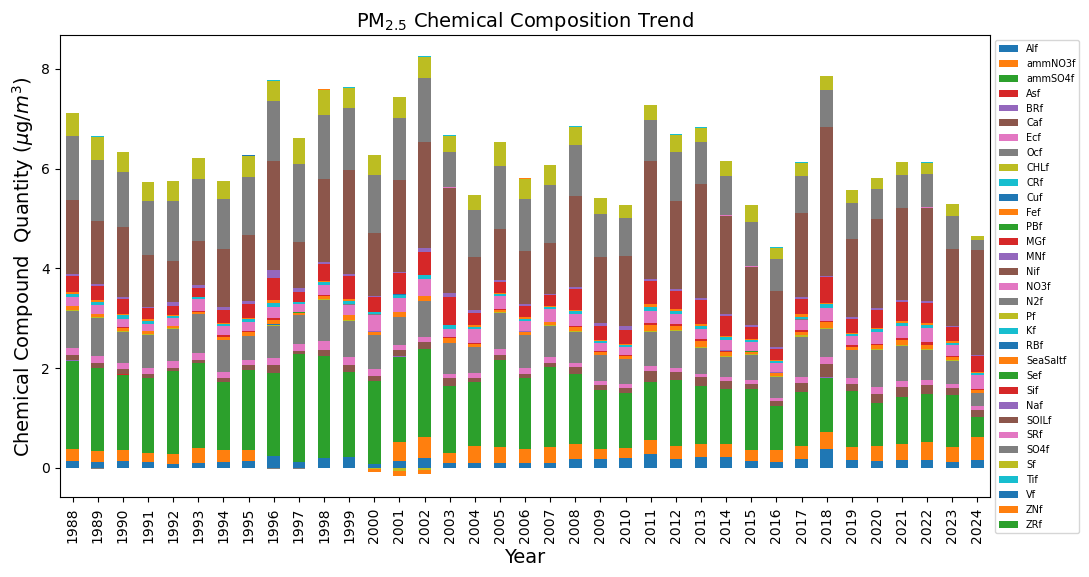

In [94]:
yearly_avg.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('PM$_{2.5}$ Chemical Composition Trend', fontsize=14)
plt.xlabel('Year', fontsize= 14)
plt.ylabel('Chemical Compound  Quantity ($\mu$g/$m^{3}$) ', fontsize = 14)
plt.legend(loc = 0, ncols=1, fontsize=7, bbox_to_anchor=(1,1))
plt.savefig('PM2.5 Chem Comp Trend.png', dpi=1200)

Mean of Compound from 1988 to 2024
---

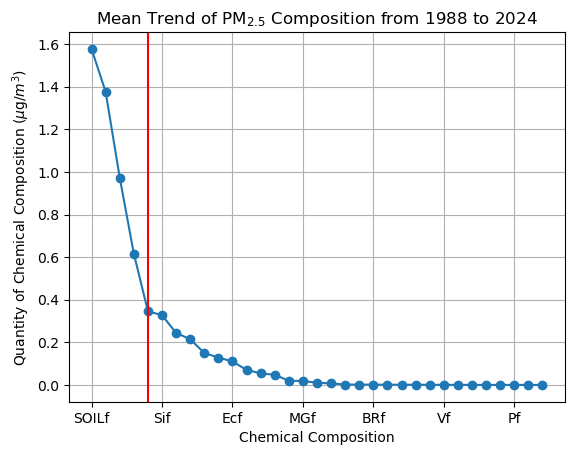

In [95]:
data_mean = yearly_avg[numerical_cols].mean()
dt_1= data_mean.sort_values(ascending=False)

dt_1.plot(grid=True, title='Mean Trend of PM$_{2.5}$ Composition from 1988 to 2024', 
                                            ylabel='Quantity of Chemical Composition ($\mu$g/$m^{3}$)',
                                           xlabel='Chemical Composition', marker='o')

plt.axvline(x=4, color='r')
plt.savefig('Mean Trend.png', dpi=1200)


In [96]:
dt_1

SOILf       1.577458
ammSO4f     1.375894
SO4f        0.973464
Ocf         0.616555
Sf          0.346138
Sif         0.327350
ammNO3f     0.244388
NO3f        0.214673
Alf         0.150077
Caf         0.128717
Ecf         0.110314
Fef         0.070699
Kf          0.054197
Naf         0.047916
SeaSaltf    0.019487
MGf         0.018802
CHLf        0.010403
Tif         0.007256
ZNf         0.002088
MNf         0.001575
BRf         0.001546
SRf         0.001092
PBf         0.000981
Cuf         0.000951
N2f         0.000738
Vf          0.000592
Asf         0.000348
CRf         0.000249
RBf         0.000218
ZRf         0.000215
Pf          0.000174
Sef         0.000158
Nif         0.000139
dtype: float64